In [ ]:
#ESTE MODELO É ONDE EU TENHO AS DUAS TENTATIVAS DE FAZER APLICAR O SARIMAX 

# importing Libraries 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
import pmdarima as pm
from scipy import stats


# Loading and Handling the Data

In [10]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [11]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [13]:
pd.to_datetime(df['Timestamp'], origin = 'unix')

0         1970-01-01 00:00:01.325317920
1         1970-01-01 00:00:01.325317980
2         1970-01-01 00:00:01.325318040
3         1970-01-01 00:00:01.325318100
4         1970-01-01 00:00:01.325318160
                       ...             
4857372   1970-01-01 00:00:01.617148560
4857373   1970-01-01 00:00:01.617148620
4857374   1970-01-01 00:00:01.617148680
4857375   1970-01-01 00:00:01.617148740
4857376   1970-01-01 00:00:01.617148800
Name: Timestamp, Length: 4857377, dtype: datetime64[ns]

In [14]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.isna().sum()

#todos sao iguais todos têm a mesma quantidade de não numeros 

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

## Prepping a Data frame by resampling the data frame

We are going to use Monthly tests because, if we use daily data we will have 3 days without any data.

In [16]:
df.index = df.Timestamp

data_frame_monthly = df.resample('M').mean()


data_frame_monthly

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-31,6.345389,6.348982,6.341218,6.346148,4.031777,25.168238,6.345955
2012-02-29,5.230208,5.231646,5.227036,5.228510,8.313993,42.239422,5.228443
2012-03-31,4.985481,4.986695,4.982580,4.983828,15.197791,76.509751,4.984397
2012-04-30,4.995171,4.996447,4.993763,4.995079,21.683913,108.218094,4.995091
...,...,...,...,...,...,...,...
2020-11-30,16535.778528,16545.663704,16525.571002,16536.023486,6.695166,111021.991229,16535.990325
2020-12-31,21811.751812,21826.119052,21796.889787,21812.155606,5.742400,129237.684380,21811.782847
2021-01-31,34554.125793,34594.169353,34512.497779,34554.252479,10.253061,352510.183906,34552.337249


In [17]:
data_frame_monthly.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

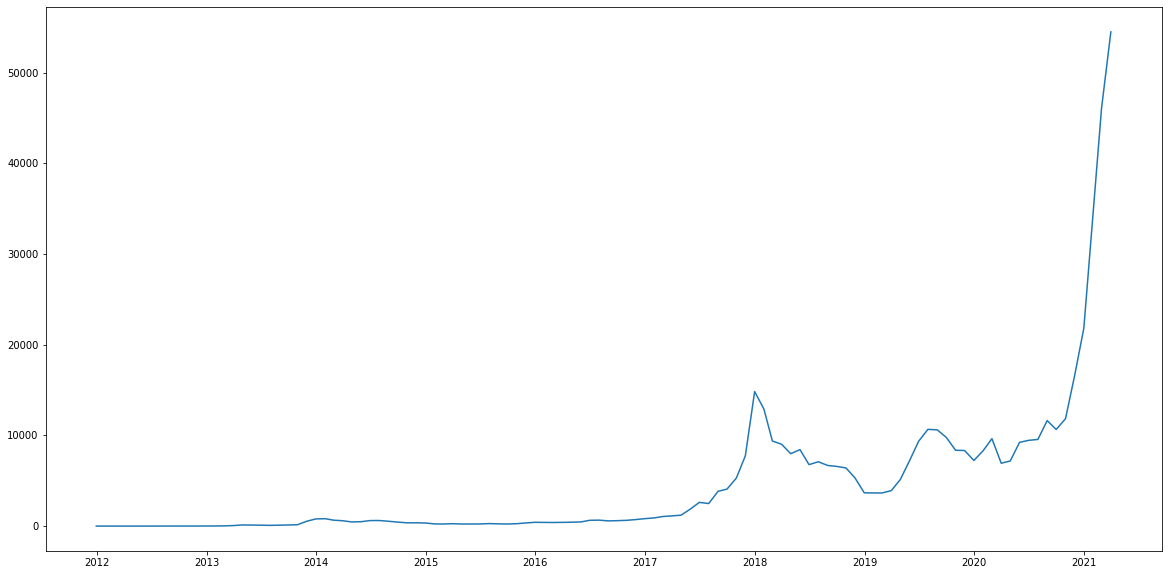

In [18]:
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(data_frame_monthly.Weighted_Price)

# Checking if the time series is stationary or if it isn't

Most Models work on the assumption that the time Series are stationary: Being stationary means that the variance is constant over time:

* constant mean
* constant variance
* autocovariance independent over time.

We will use the `Dickey-Fuller` Test to check if it is stationary: 



Here the null hypothesis is that the Time series is non-stationary. in other words: 

* if the result is `> 5%` the data set is `non-stationary`.
* if the result is `< 5%` the data set is `stationary`.


In [19]:
def Dickey_fuller_test(x):
    
    ''' Função para verificar se a serie é stationary ou não'''
    
    Dickey_fuller = sm.tsa.stattools.adfuller(x)
    print(f'Dickey-Fuller p = {Dickey_fuller[1]}')
    if Dickey_fuller[1] > 0.05:
        print('Time series is non-stationary')
    else:
        print('Time series is stationary')
    
    


Dickey-Fuller p = 0.9988330673686178
Time series is non-stationary


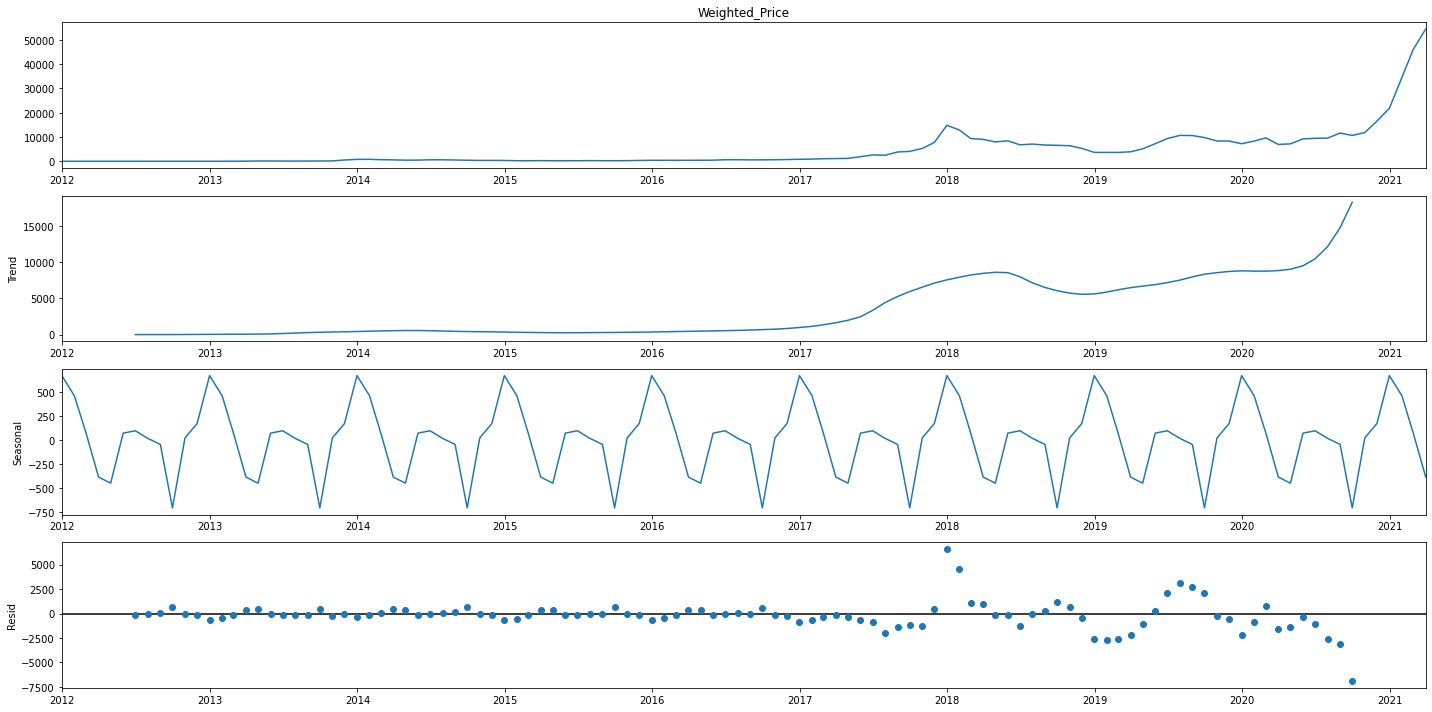

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
sm.tsa.seasonal_decompose(data_frame_monthly.Weighted_Price).plot()

Dickey_fuller_test(data_frame_monthly.Weighted_Price)

In [21]:
data_frame_monthly['Weighted_Price']

Timestamp
2011-12-31        4.471603
2012-01-31        6.345955
2012-02-29        5.228443
2012-03-31        4.984397
2012-04-30        4.995091
                  ...     
2020-11-30    16535.990325
2020-12-31    21811.782847
2021-01-31    34552.337249
2021-02-28    46075.783298
2021-03-31    54499.282182
Freq: M, Name: Weighted_Price, Length: 112, dtype: float64

# Transforming data using the Box-Cox transformation:


The `Box-Cox transformation` transforms our data so that it closely resembles a normal distribution. In many statistical techniques, we assume that the errors are normally distributed.

This is one of the first steps so that we make our data stationary.

In [22]:
data_frame_monthly['Weighted_Price_box'], Lambda = stats.boxcox(data_frame_monthly['Weighted_Price'])
#print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

In [23]:
Dickey_fuller_test(data_frame_monthly['Weighted_Price_box'])

Dickey-Fuller p = 0.9264088902950908
Time series is non-stationary


# Checking Trend and Seasonality

In order to make a model stationary we need to check if the time series stationary we need to check if it has a `trend` and `seasonality` and then correct them:

1. **Trend** – varying mean over time.
2. **Seasonality** – variations at specific time-frames.

## Differencing the model:

 In this technique, we take the difference of the observation at a particular instant with that at the previous instant. To see if we can make the model stationary 
 
 ### Seasonal Differentiation
 
 A Seasonal differentiation compares the data from a period against the same period last year.

In [52]:
data_frame_monthly['weighted_Box_Difference'] = data_frame_monthly['Weighted_Price_box']-data_frame_monthly['Weighted_Price_box'].shift(12)
Dickey_fuller_test(data_frame_monthly['weighted_Box_Difference'][12:])


#data_frame_monthly['weighted_Box_Difference'].isna().sum()
#temos que tirar os primeiros 12 porque nao temos esses dados.   

Dickey-Fuller p = 0.44219018966713597
Time series is non-stationary


### Regular Differentiation
 
 A Seasonal differentiation compares the data from a period against the previous period.

In [24]:
data_frame_monthly['weighted_Box_Reg_Difference'] = data_frame_monthly['Weighted_Price_box']-data_frame_monthly['Weighted_Price_box'].shift(1)
Dickey_fuller_test(data_frame_monthly['weighted_Box_Reg_Difference'][1:])


Dickey-Fuller p = 3.867021258896861e-09
Time series is stationary


## Decomposing the model:

 In this case seasonality and trend are going to be modeled separately so that we get the remaining part - the Residue.

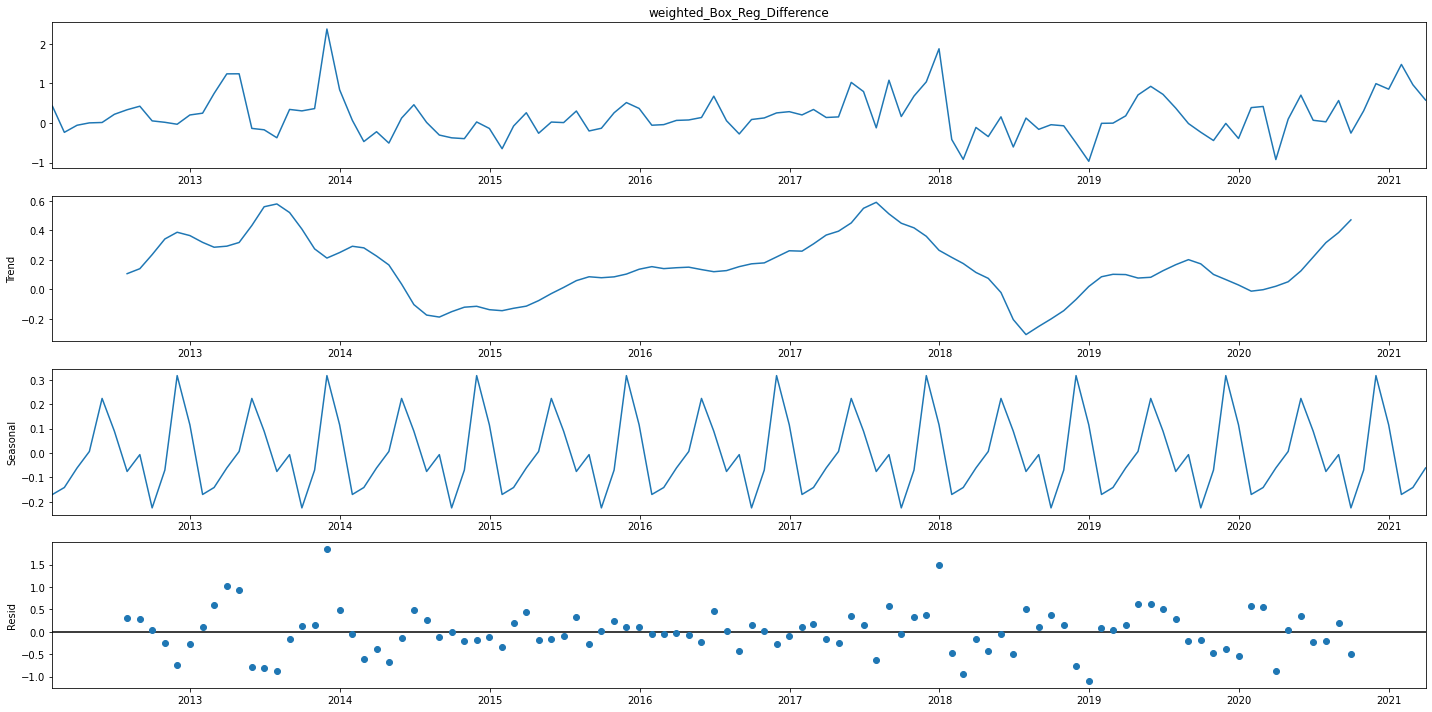

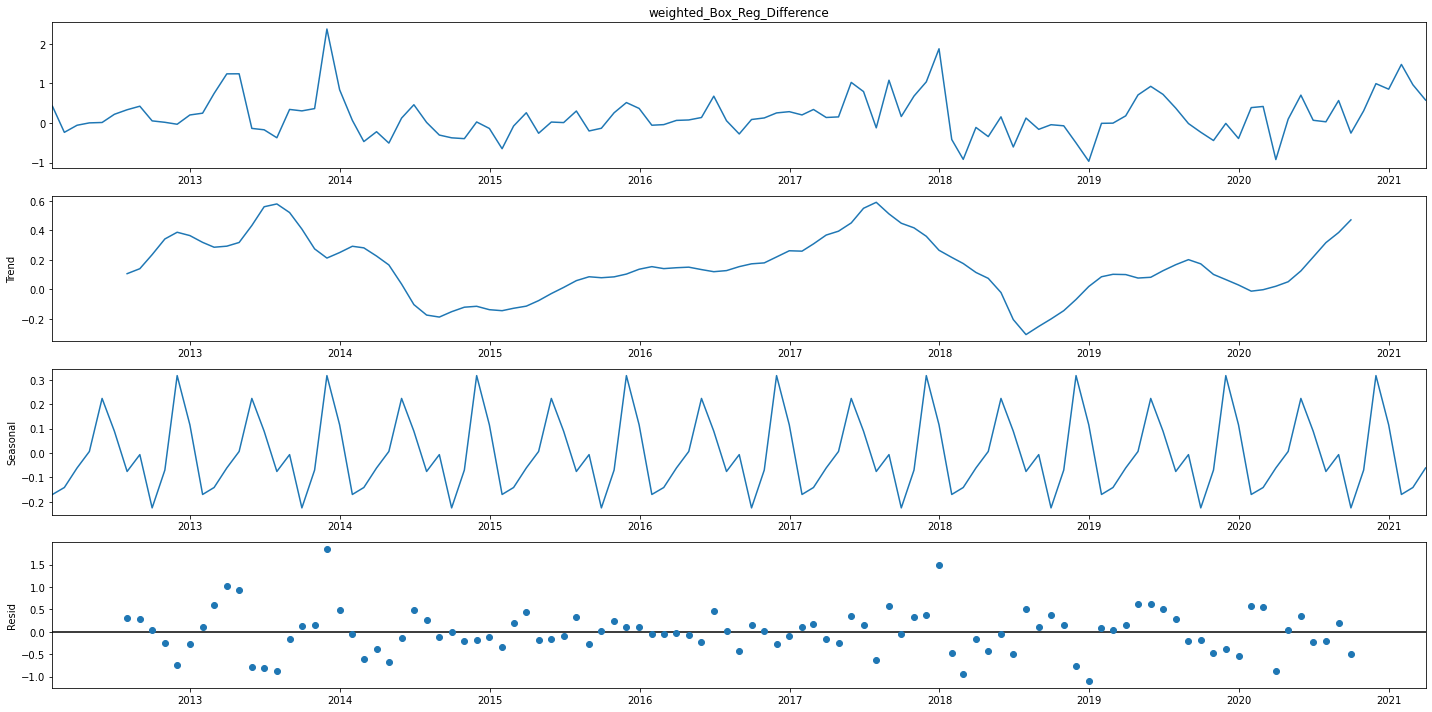

In [25]:
sm.tsa.seasonal_decompose(data_frame_monthly['weighted_Box_Reg_Difference'][1:]).plot()


#O gajo colocou 13 mas não sei bem por que, se der pau, temos que voltar aqui e colocar 13.


# SARIMAX Model (seasonal auto regressive integrated moving average)

* 1 - The AR (p): is a lag we are going to use:
* 2 - The MA (q): is the order of the moving average: it is the difference between a certain value and the moving average at a certain place.
* 3 - The (d): is the the number of nonseasonal differences. 

To find them o need to look at the autocorrelation and partial-autocorrelation graphs.

In [26]:

data_frame_monthly.weighted_Box_Reg_Difference[13:].count()


99

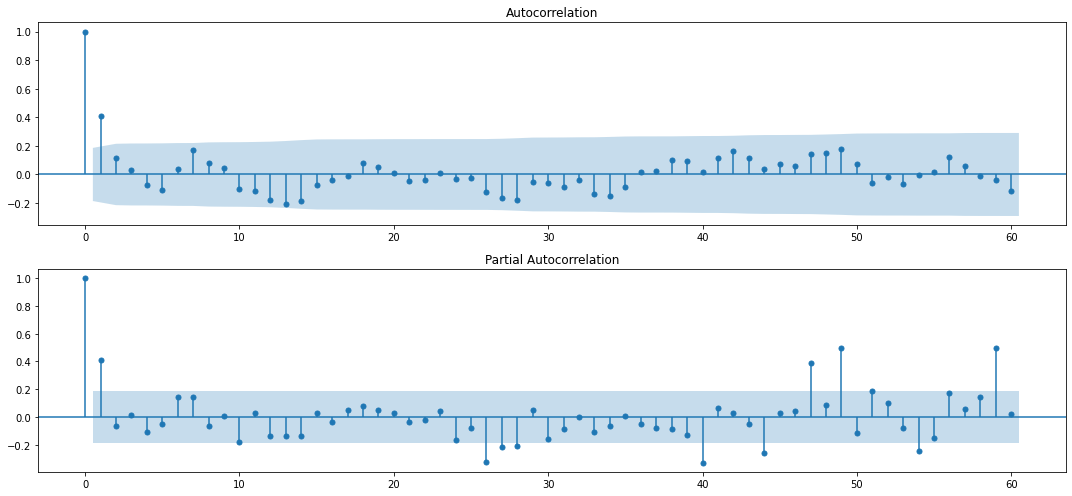

In [27]:
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data_frame_monthly['weighted_Box_Reg_Difference'][1:].values.squeeze(), lags=60, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data_frame_monthly['weighted_Box_Reg_Difference'][1:].values.squeeze(), lags=60, ax=ax)
plt.tight_layout()
plt.show()

##from here we have q of 2

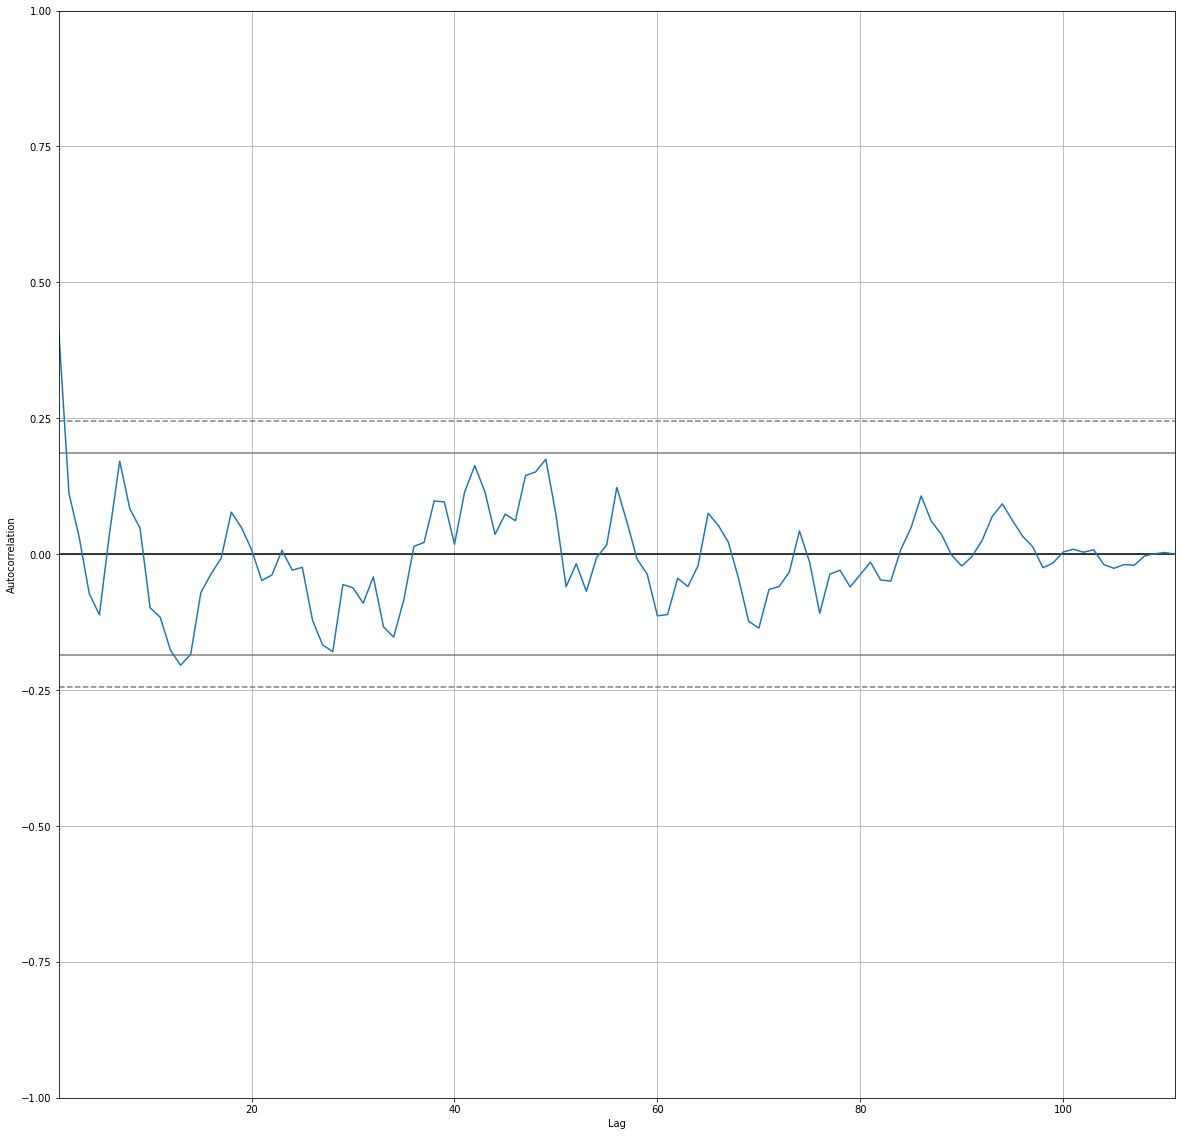

In [28]:

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
%matplotlib inline


plt.rcParams["figure.figsize"] = (20,20)
autocorrelation_plot(data_frame_monthly['weighted_Box_Reg_Difference'][1:])
pyplot.show()

#from here we conclude p is 0, 1 or 2 

In [29]:

model =  pm.auto_arima(data_frame_monthly['Weighted_Price_box'],
                     seasonal = True,
                     m = 12,
                     d = 1, D = 1,
                     start_p = 0,start_q = 0,
                     max_p = 2, max_q = 2,
                     max_P = 2, max_Q = 2,
                     trace = True,
                     error_action='ignore',
                      suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=247.634, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=192.036, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=223.267, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=179.497, Time=0.80 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=175.920, Time=2.87 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=174.402, Time=0.79 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=6.56 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=inf, Time=3.91 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=177.913, Time=8.78 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.26 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.18 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=1.29 sec

In [30]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(data_frame_monthly['Weighted_Price_box'],order = (1,1,0), seasonal_order = (1,1,1,12))

results = model.fit()

PREDICTIONS = pd.Series(results)

Dickey–Fuller test:: p=0.000000


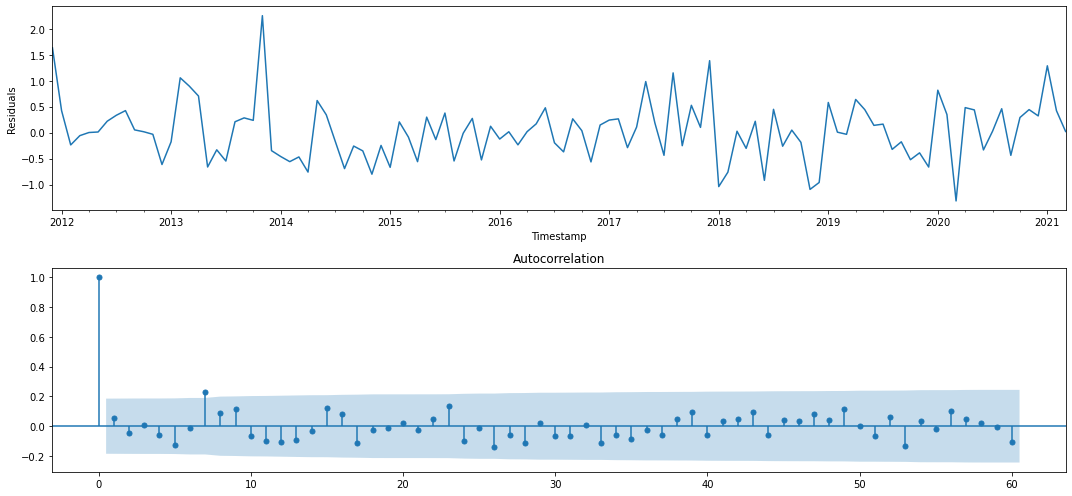

In [31]:
plt.figure(figsize=(15,7))
plt.subplot(211)
results.resid.plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(results.resid.values.squeeze(), lags=60, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(results.resid)[1])

plt.tight_layout()
plt.show()

Dickey–Fuller test:: p=0.000000


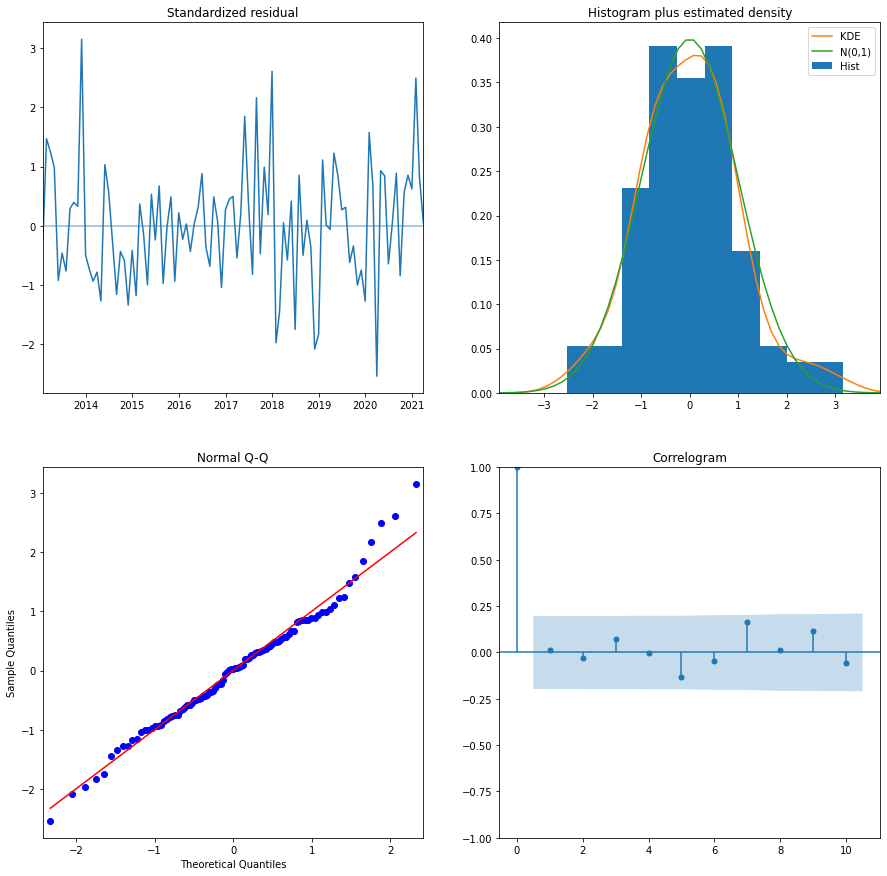

In [32]:
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(results.resid)[1])

results.plot_diagnostics(figsize = (15,15))
plt.show()

# Prediction

Now we need to take the data back to its original form:

In [33]:
#fist we need to reverse the box cox

def invboxcox(y,lmbda):
   if Lambda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [34]:
data_frame_monthly['Weighted_Price'].isna().sum()

0

In [35]:
data_frame_monthly['Weighted_Price'].tail()

Timestamp
2020-11-30    16535.990325
2020-12-31    21811.782847
2021-01-31    34552.337249
2021-02-28    46075.783298
2021-03-31    54499.282182
Freq: M, Name: Weighted_Price, dtype: float64

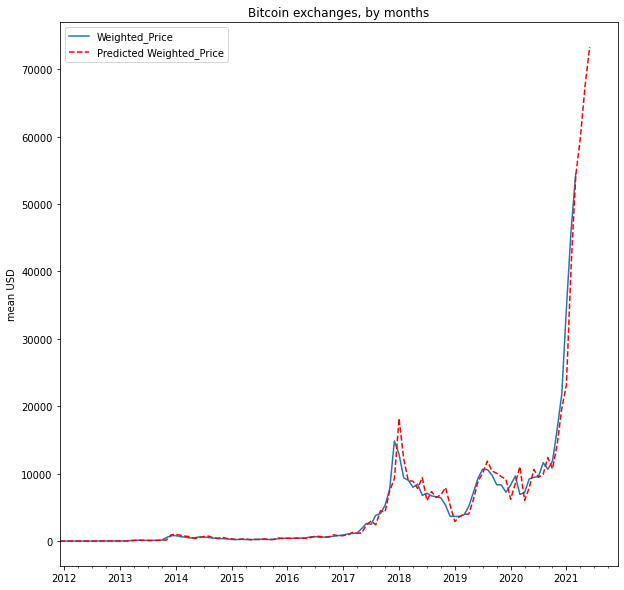

In [38]:
dataframe_month2 = data_frame_monthly[['Weighted_Price']]
date_list = [datetime(2021, 4, 30), datetime(2021, 5, 31), datetime(2021, 6, 30), datetime(2021, 7, 30), 
            datetime(2021, 8, 31), datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30),
            datetime(2021, 12, 31)]
future = pd.DataFrame(index=date_list, columns= data_frame_monthly.columns)
dataframe_month2 = pd.concat([dataframe_month2, future])
dataframe_month2['forecast'] = invboxcox(results.predict(start=0, end=114), Lambda)
plt.figure(figsize=(10,10))
dataframe_month2.Weighted_Price.plot()
dataframe_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()